# Para iniciarmos o código, vamos importar as bibliotecas necessárias para que construamos a nossa CNN (Convolutional Neural Network)

In [93]:
import os
import zipfile
import kagglehub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Configure TensorFlow and NumPy seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Suppress TensorFlow log messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Agora vamos fazer o Download do Dataset de Frutas e Vegetais
Vamos também verificar e extrair o arquivo (Estou fazendo isso porque, muitas vezes durante a implementação, deu problema com o arquivo de imagens...)

In [94]:
# Download the dataset from Kaggle using kagglehub
dataset_path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")
print("Dataset file path:", dataset_path)

# Check if the downloaded file is a ZIP and extract it
if dataset_path.endswith('.zip'):
    extracted_path = "./dataset"  # Change this directory if desired
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
    print("Dataset extracted to:", extracted_path)
else:
    extracted_path = dataset_path


Dataset file path: C:\Users\Marcelo\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8


Agora vamos listar as pastas do diretório, monstrando também quais os tipos de frutas e vegetais que possuímos no dataset 
Estou fazendo isso pra clarificar, durante a implementação, o tipo de dados com que estou mexendo...

In [95]:
# List the top-level directories in the extracted dataset folder
print("Contents of the extracted dataset folder:")
print(os.listdir(extracted_path))
# Expected output should include: ['test', 'train', 'validation']

# List the contents of the 'train' directory to see the class folders
train_path = os.path.join(extracted_path, "train")
print("Contents of train directory:")
print(os.listdir(train_path))


Contents of the extracted dataset folder:
['test', 'train', 'validation']
Contents of train directory:
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


Nessa parte do código eu busquei entender qual o nome dos arquivos dentro de cada pasta, além de sinalizar se a imagem procurada foi encontrada.
Essa parte foi importante durante a implementação, porque me ajudou a esclarecer o modelo das imagens, o que facilitou bastante o tratamento delas.

In [96]:
# Construct the full image path using os.path.join.
# Adjust the folder names according to the dataset structure.
# For example, if we want to load an image from the "apple" class in the training set:
img_path = os.path.join(extracted_path, "train", "apple", "Image_1.jpg")
print("Full image path:", img_path)

# Check if the image file exists. If not, print the contents of the 'apple' folder.
if not os.path.exists(img_path):
    print("Image not found. Contents of the 'apple' folder:")
    apple_folder = os.path.join(extracted_path, "train", "apple")
    print(os.listdir(apple_folder))
else:
    print("Image found!")


Full image path: C:\Users\Marcelo\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\apple\Image_1.jpg
Image found!


# Primeira Visualização do Dataset
Nessa parte do código, criei a função de visualizar o dataset.
Primeiramente, escolhi qual o arquivo seria mostrado. Depois mostrei a imagem escolhida.

Contents of 'train/apple':
['Image_1.jpg', 'Image_10.jpg', 'Image_16.jpg', 'Image_17.jpg', 'Image_18.jpg', 'Image_19.jpg', 'Image_2.jpg', 'Image_20.jpg', 'Image_21.jpg', 'Image_23.jpg', 'Image_24.jpg', 'Image_25.jpg', 'Image_26.jpg', 'Image_27.jpg', 'Image_28.jpg', 'Image_3.jpg', 'Image_31.jpg', 'Image_32.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_35.png', 'Image_36.jpg', 'Image_37.jpg', 'Image_38.jpg', 'Image_39.jpg', 'Image_40.jpg', 'Image_41.jpg', 'Image_42.jpg', 'Image_43.jpg', 'Image_44.jpg', 'Image_45.jpg', 'Image_47.jpg', 'Image_48.jpg', 'Image_49.jpg', 'Image_5.JPG', 'Image_50.jpg', 'Image_51.jpg', 'Image_52.jpg', 'Image_53.png', 'Image_54.jpg', 'Image_55.jpg', 'Image_56.jpg', 'Image_57.jpg', 'Image_58.jpg', 'Image_59.png', 'Image_6.jpg', 'Image_60.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_63.jpg', 'Image_64.jpg', 'Image_65.png', 'Image_67.jpg', 'Image_68.jpg', 'Image_69.jpg', 'Image_7.jpg', 'Image_71.png', 'Image_76.png', 'Image_78.jpg', 'Image_80.jpg', 'Image_81.png', 'I

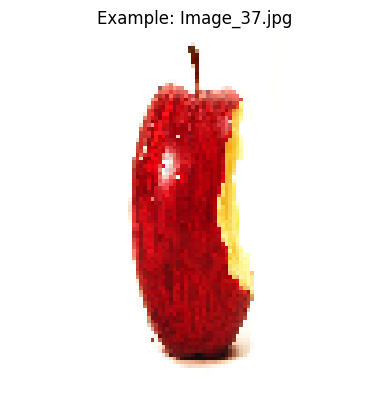

In [97]:
# Cell: List files in 'train/apple' and display an image

# Construct the path to the 'apple' folder in the training set
apple_folder = os.path.join(extracted_path, "train", "apple")
print("Contents of 'train/apple':")
files = os.listdir(apple_folder)
print(files)

# Check if there are any files and choose the first one as an example
if len(files) > 0:
    chosen_file = files[22] 
    img_path = os.path.join(apple_folder, chosen_file)
    print("Using image file:", chosen_file)
    
    # Load the image with a target size of 100x100 pixels
    img = load_img(img_path, target_size=(100, 100))
    img_array = img_to_array(img)
    
    # Display the image using matplotlib
    plt.imshow(img_array.astype('uint8'))
    plt.title(f"Example: {chosen_file}")
    plt.axis('off')
    plt.show()
else:
    print("No image files found in the 'train/apple' folder.")


# Visualização de Dados Randomicos
Nessa função, me atentei a mostrar diferentes tipos de imagens presentes no dataset.
Portanto, essa função retorna imagens "aleatórias" do dataset, mostrando a diversidade dos dados presentes.
Isso é de suma importância, porque nos ajuda a entender o tipo de dados que usamos.
Experimente rodar essa cell várias vezes...

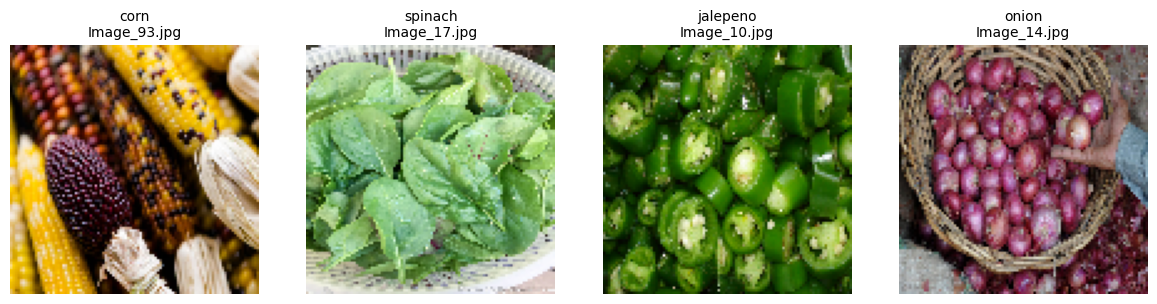

In [98]:
#This function returns 04 random fruits/vegetables from the dataset.
#The importance of it is to visualize the dataset and show how the data is.
import random

def show_random_fruits(parent_directory, num_images=4, target_size=(100, 100)):
    """
    Displays a specified number of random fruit images from any subfolder within the parent directory.
    
    Parameters:
    - parent_directory: The directory containing subfolders for each fruit class (e.g., 'train').
    - num_images: Number of random images to display.
    - target_size: Tuple representing the target image size (width, height) for resizing images.
    """
    # Get a list of all subdirectories (each representing a fruit class)
    subfolders = [os.path.join(parent_directory, d) 
                  for d in os.listdir(parent_directory) 
                  if os.path.isdir(os.path.join(parent_directory, d))]
    
    # Create a list to store all image paths along with their folder (class) names
    image_paths = []
    for folder in subfolders:
        files = os.listdir(folder)
        for file in files:
            full_path = os.path.join(folder, file)
            # Consider only common image file extensions
            if full_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append((folder, full_path))
    
    if len(image_paths) == 0:
        print("No image files found in any subdirectory of", parent_directory)
        return
    
    # Adjust the number of images if fewer are available
    if len(image_paths) < num_images:
        num_images = len(image_paths)
    
    # Randomly sample 'num_images' images from the list
    chosen_images = random.sample(image_paths, num_images)
    
    # Plot the selected images
    plt.figure(figsize=(num_images * 3, 3))
    for i, (folder, path) in enumerate(chosen_images):
        try:
            img = load_img(path, target_size=target_size)
            img_array = img_to_array(img)
        except Exception as e:
            print(f"Error loading {path}: {e}")
            continue
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img_array.astype('uint8'))
        # Use the folder name as the class label
        fruit_class = os.path.basename(folder)
        plt.title(f"{fruit_class}\n{os.path.basename(path)}", fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage: Assuming your extracted dataset has a 'train' folder
train_folder = os.path.join(extracted_path, "train")
show_random_fruits(train_folder, num_images=4, target_size=(100, 100))


# Criando a CNN (Convolutional Neural Network)

Importando Bibliotecas úteis

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Criando o gerador de dados com augmentation


O Data Augmentation é uma técnica de pré-processamento de dados que cria versões modificadas das imagens originais do conjunto de treinamento. Ela é responsável por:
* Aumentar artificialmente o tamanho do dataset de treinamento
* Prevenir overfitting
* melhorar a generalização do modelo

Nesse código nós fazemos a Rotação, o Espelhamento, o Zoom, a Mudança de Briho, o Deslocamento e o Cisalhamento.

In [100]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,        # Aumentado de 20 para 40
    width_shift_range=0.3,    # Aumentado de 0.2 para 0.3
    height_shift_range=0.3,   # Aumentado de 0.2 para 0.3
    horizontal_flip=True,
    vertical_flip=True,       # Adicionado flip vertical
    zoom_range=0.3,          # Aumentado de 0.2 para 0.3
    shear_range=0.3,         # Aumentado de 0.2 para 0.3
    brightness_range=[0.7,1.3], # Adicionado variação de brilho
    fill_mode='nearest'
)

Inicializando a CNN

Além disso, vamos normalizar os dados, visto que ele altera a quantidade de pixels para um range padrão.
Isso vai aumentar a estabilidade e performance do modelo, prevenindo que grandes valores dominem o processo de aprendizado

In [101]:
# Create a new Sequential model
classifier = Sequential()
# Normalize pixel values
classifier.add(Rescaling(1./255, input_shape=(100, 100, 3)))

# Camadas Convolucionais
Adiciona três blocos convolucionais, cada um contendo:
* Camada Conv2D para extração de características
* BatchNormalization para estabilidade do treinamento
* MaxPooling2D para redução de dimensionalidade


In [102]:
# First Convolutional Block
classifier.add(Conv2D(32, (3, 3), padding= 'same', input_shape=(100, 100, 3), activation='relu'))
classifier.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(tf.keras.layers.Dropout(0.25))


# Second Convolutional Block
classifier.add(Conv2D(64, (3, 3), padding= 'same', activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(tf.keras.layers.Dropout(0.25))


# Third Convolutional Block
classifier.add(Conv2D(128, (3, 3), padding= 'same', activation='relu'))
classifier.add(Conv2D(128, (3, 3), activation='relu'))

classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(tf.keras.layers.Dropout(0.25))


# Processo de Flattening 
* Após as camadas convolucionais e de pooling, temos dados em formato 3D (altura × largura × profundidade)
* O Flattening converte essa matriz 3D em um vetor 1D (unidimensional) --> Nesse caso, a matriz 100x100x3 vira um vetor de 30000 elementos (100x100x3 = 30000)


In [103]:
#Flatten Layer
classifier.add(Flatten())

# Camadas Densas
Adiciona camadas totalmente conectadas com dropout para: 
* Aprender características de alto nível
* Prevenir overfitting

In [104]:
# Dense Layers
# Fully connected layers with Dropout
classifier.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

classifier.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

# Camada de saída
classifier.add(Dense(36, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # 36 classes output
#Aqui usaremos 36 unidades porque estamos trabalhando com 36 classes diferentes. E, além disso, estamos usando a função softmax,
#pois estamos lidando com dadods de múltiplas classes. (Caso fossem só 02, usaríamos a função sigmoid, por exemplo.)


# Compilação do Modelo
Configura o processo de treinamento com:
* Otimizador Adam para aprendizado eficiente
* Função de perda categorical_crossentropy para classificação multiclasse
* Métrica de acurácia para avaliação

In [105]:
classifier.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.00005,  # Learning rate reduzido
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-08
    ),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Preparação dos Dados
Configura os geradores de dados para:
* Dados de treinamento
* Dados de validação
* Dados de teste
* Inclui aumento de dados para prevenir overfitting

Dados de treinamento

In [106]:
train_dataset = image_dataset_from_directory(
    os.path.join(extracted_path, "train"), 
    labels='inferred',
    label_mode='categorical',  #Categorical porque estamos trabalhando com um problema de 36 classes.
    image_size=(100, 100),
    batch_size=32, #Batch é o número de amostras que serão processadas antes de atualizar os parâmetros do modelo durante o treinamento.
    #Estamos usando 32 de tamanho, porque é um número considerado razoável, e bastante utilizado. (Números maiores iriam requerir muita memória)
    shuffle=True
)
#A função image_dataset_from_directory() é uma função do TensorFlow que prepara os dados de imagem para treinamento/teste
#O parâmetro Shuffle embaralha aleatoriamente as imagens antes de cada época, o que reduz o risco de overfitting, melhorando, assim,
#a generalização do modelo

Found 3115 files belonging to 36 classes.


Dados de validação

In [107]:
# Prepare validation dataset
validation_dataset = image_dataset_from_directory(
    os.path.join(extracted_path, "validation"),
    labels='inferred',
    label_mode='categorical',
    image_size=(100, 100),
    batch_size=32,
    shuffle=True
)

Found 351 files belonging to 36 classes.


Dados de teste

In [108]:
# Prepare test dataset
test_dataset = image_dataset_from_directory(
    os.path.join(extracted_path, "test"),
    labels='inferred',
    label_mode='categorical',
    image_size=(100, 100),
    batch_size=32,
    shuffle=False  # No need to shuffle test data
)


Found 359 files belonging to 36 classes.


Implementamos Early Stopping para evitar overtraining

In [109]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    min_delta = 0.001
)

Reduzir learning rate quando o modelo parar de melhorar

In [110]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=0.00001,
    min_delta = 0.001
)

# Treinamento do Modelo
Treina o modelo usando:
* Datasets preparados
* 25 épocas
* Monitoramento da validação

In [111]:
# Train the model
history = classifier.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=25,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 509ms/step - accuracy: 0.0291 - loss: 18.8156 - val_accuracy: 0.0285 - val_loss: 17.6388 - learning_rate: 5.0000e-05
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 515ms/step - accuracy: 0.0612 - loss: 18.1439 - val_accuracy: 0.0285 - val_loss: 18.3592 - learning_rate: 5.0000e-05
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 543ms/step - accuracy: 0.0908 - loss: 17.6046 - val_accuracy: 0.0285 - val_loss: 20.8720 - learning_rate: 5.0000e-05
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 551ms/step - accuracy: 0.1176 - loss: 17.1994 - val_accuracy: 0.0370 - val_loss: 22.5972 - learning_rate: 5.0000e-05
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 554ms/step - accuracy: 0.1499 - loss: 16.8425 - val_accuracy: 0.0484 - val_loss: 21.8002 - learning_rate: 5.0000e-05
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 555ms/step - accuracy: 0.1854 - loss: 16.4614 - val_accuracy: 0.0741 - val_loss: 19.2486 - learning_rate: 5.0000e-05
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 555m

# Salvamento e Carregamento do Modelo
* Salva o modelo treinado para uso futuro
* Carrega e avalia o modelo nos dados de teste

In [112]:
# Save the trained model
classifier.save('trained_model.keras')

In [113]:
# Load the saved model
loaded_model = load_model('trained_model.keras')


In [114]:

# Evaluate the model on the test set and print the accuracy
test_loss, test_acc = loaded_model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - accuracy: 0.3616 - loss: 14.7231
Test accuracy: 0.3955431878566742


# Função de Predição
Cria uma função para:
* Carregar e pré-processar novas imagens
* Fazer predições
* Mostrar resultados com níveis de confiança


In [115]:
train_dir = os.path.join(extracted_path, "train")
class_names = sorted([item.name for item in os.scandir(train_dir) if item.is_dir()])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Raw prediction vector: [[2.8889086e-02 7.8743659e-03 3.4255702e-03 1.4435853e-01 3.0141886e-02
  7.3184366e-03 1.2642952e-03 3.6392277e-04 4.9844654e-03 2.1207398e-03
  3.9360809e-01 5.8335193e-02 5.9116837e-02 3.5497485e-04 1.6984289e-03
  1.2457951e-02 3.1266164e-03 9.4131483e-03 4.4395050e-04 3.8054366e-02
  6.0548395e-02 3.9365217e-03 1.7435969e-03 5.5197831e-02 2.3342132e-04
  2.5701619e-04 9.5999049e-04 1.4194776e-03 6.3952198e-03 4.8056547e-05
  1.2906900e-03 1.0169296e-02 4.2545791e-03 3.0687150e-02 4.0434380e-03
  1.1464453e-02]]
True class: chilli pepper
Predicted class: cucumber
Confidence: 39.36%


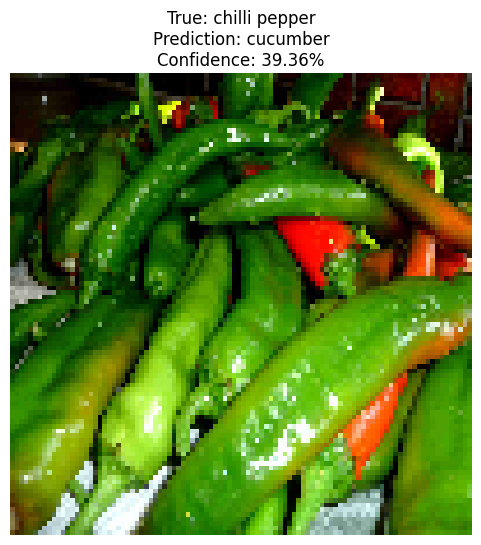

In [187]:
def predict_fruit_veggie(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(100, 100))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image data exactly as in training
    img_array = img_array / 255.0
    
    # Make prediction and print the raw output for debugging
    prediction = loaded_model.predict(img_array)
    print("Raw prediction vector:", prediction)  # Debug print

    # Get the class names; ensure this ordering matches training
    class_names = sorted(os.listdir(os.path.join(extracted_path, "train")))
    
    # Get the predicted class index and probability
    predicted_class_idx = np.argmax(prediction[0])
    confidence = prediction[0][predicted_class_idx]
    
    return class_names[predicted_class_idx], confidence

# Get a random test image path
test_dir = os.path.join(extracted_path, "test")
if not os.path.exists(test_dir):
    raise ValueError(f"Test directory not found at: {test_dir}")
class_folders = [folder for folder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, folder))]
if not class_folders:
    raise ValueError("No class folders found in test directory")
random_class = random.choice(class_folders)
class_dir = os.path.join(test_dir, random_class)
images_in_class = os.listdir(class_dir)
if not images_in_class:
    raise ValueError(f"No images found in class folder: {random_class}")
random_image = random.choice(images_in_class)
image_path = os.path.join(class_dir, random_image)

# Use the image path in your prediction
predicted_class, confidence = predict_fruit_veggie(image_path)
print(f"True class: {random_class}")
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2%}")

# Display the image with its prediction
plt.figure(figsize=(6, 6))
img = load_img(image_path, target_size=(100, 100))
plt.imshow(img)
plt.title(f"True: {random_class}\nPrediction: {predicted_class}\nConfidence: {confidence:.2%}")
plt.axis('off')
plt.show()